In [10]:
# imports -- change ip and fingerprint between hosts
import pandas as pd
import pyexasol

host = '192.168.56.102/DC90C14858BD2A0A3FE10C5245C4032AF3E179041AB66687CF4E8430A7FC94EE:8563'   # Don't forget to change the fingerprint
user = 'sys'
password = 'exasol'

# Connect to Exasol
conn = pyexasol.connect(dsn=host, 
                        user=user, 
                        password=password, 
                        debug=False, 
                        protocol_version=pyexasol.PROTOCOL_V1)

In [11]:
q = '''
SELECT QUERYDIM.QUERY, TIMEDIM.[month], TIMEDIM.[day of the month], (TIMEDIM.[day of the year] - 60) as DaysAfterDBStart, TIMEDIM.[hour], TIMEDIM.[minute], FACTS.QUERYID, FACTS.TIMEID, FACTS.ANONID, (TIMEDIM.[hour]*60 + TIMEDIM.[minute]) as MinutesAfterMidnight
FROM AOL_SCHEMA.QUERYDIM 
    LEFT JOIN AOL_SCHEMA.FACTS ON QUERYDIM.ID = FACTS.QUERYID
    LEFT JOIN AOL_SCHEMA.TIMEDIM ON QUERYDIM.ID = TIMEDIM.ID
    LEFT JOIN AOL_SCHEMA.URLDIM ON FACTS.URLID = URLDIM.ID
WHERE FACTS.CLICK = 1 AND URLDIM.URL = 'http://www.youtube.com'
    AND (QUERYDIM.QUERY IS NOT NULL
        AND TIMEDIM.[hour] IS NOT NULL
        AND TIMEDIM.[minute] IS NOT NULL
        AND TIMEDIM.[day of the year] IS NOT NULL
        AND QUERYDIM.QUERY NOT LIKE '%youtube%'
        AND QUERYDIM.QUERY NOT LIKE '%you tube%'
        AND QUERYDIM.QUERY NOT LIKE '%your tube%')
'''
# Select (see select clause) when the youtube link was clicked
pd.set_option("display.max_colwidth", None)
def printQuery(query, connection):
    stmt = connection.export_to_pandas(query)
    print(stmt.head())
    return stmt
    
queries = printQuery(q, conn)
print(queries.shape, queries.columns, sep="\n")


                            QUERY      month  day of the month  \
0                     jake peyton  march                     1   
1             bush drinking video  april                    26   
2  cant stop scratching my vagina  april                    26   
3                      vid idiots  april                    19   
4                 naruto websites  may                       9   

   DAYSAFTERDBSTART  hour  minute  QUERYID   TIMEID  ANONID  \
0                 0     0      13  2775687  5962961  154767   
1                56     9      31  2778308  5986392   53322   
2                56     2      19  2774391  4104872  317691   
3                49    16       6  2785441  2778338  126651   
4                69    15      44  2787473  5086065    7725   

   MINUTESAFTERMIDNIGHT  
0                    13  
1                   571  
2                   139  
3                   966  
4                   944  
(2028, 10)
Index(['QUERY', 'month', 'day of the month', 'DAYSAFTERDB

In [6]:
queries.columns

Index(['QUERY', 'month', 'day of the month', 'DAYSAFTERDBSTART', 'hour',
       'minute', 'QUERYID', 'TIMEID', 'ANONID', 'MINUTESAFTERMIDNIGHT'],
      dtype='object')

In [50]:
queries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   QUERY                 2028 non-null   object
 1   month                 2028 non-null   object
 2   day of the month      2028 non-null   int64 
 3   DAYSAFTERDBSTART      2028 non-null   int64 
 4   hour                  2028 non-null   int64 
 5   minute                2028 non-null   int64 
 6   QUERYID               2028 non-null   int64 
 7   TIMEID                2028 non-null   int64 
 8   ANONID                2028 non-null   int64 
 9   MINUTESAFTERMIDNIGHT  2028 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 158.6+ KB


In [7]:
q = '''
SELECT *
FROM AOL_SCHEMA.WEATHER_EVENTS
'''
    
weather = conn.export_to_pandas(q)
print(weather.shape, weather.columns, sep="\n")


(25734, 17)
Index(['BEGIN_DATE_TIME', 'END_DATE_TIME', 'EVENT_TYPE', 'REGION',
       'STATE_FIPS', 'BEGIN_DAY', 'END_DAY', 'BEGIN_MONTH', 'END_MONTH',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'EPISODE_ID',
       'EVENT_ID'],
      dtype='object')


In [9]:
weather.head(15)

,BEGIN_DATE_TIME,END_DATE_TIME,EVENT_TYPE,REGION,STATE_FIPS,BEGIN_DAY,END_DAY,BEGIN_MONTH,END_MONTH,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,EPISODE_ID,EVENT_ID
0,2006-01-01 00:00:00.000000,2006-01-31 23:59:00.000000,Drought,Colorado,8,1,31,1,1,0,0,0,0,1000,NaN,202408,5482479
1,2006-01-01 00:00:00.000000,2006-01-31 23:59:00.000000,Drought,Texas,48,1,31,1,1,0,0,0,0,1000,NaN,203632,5486559
2,2006-01-01 00:00:00.000000,2006-01-31 23:59:00.000000,Drought,Texas,48,1,31,1,1,0,0,0,0,1000,NaN,203632,5486558
3,2006-01-01 00:00:00.000000,2006-01-31 23:59:00.000000,Drought,Oklahoma,40,1,31,1,1,0,0,0,0,1000,NaN,203694,5486086
4,2006-01-01 00:00:00.000000,2006-01-31 23:59:00.000000,Drought,Oklahoma,40,1,31,1,1,0,0,0,0,1000,NaN,203694,5486085
5,2006-01-01 00:00:00.000000,2006-01-31 23:59:00.000000,Drought,Oklahoma,40,1,31,1,1,0,0,0,0,1000,NaN,203694,5486084
6,2006-01-01 00:00:00.000000,2006-01-31 23:59:00.000000,Drought,Oklahoma,40,1,31,1,1,0,0,0,0,1000,NaN,203694,5486083
7,2006-01-01 00:00:00.000000,2006-01-31 23:59:00.000000,Drought,Oklahoma,40,1,31,1,1,0,0,0,0,1000,NaN,203694,5486082
8,2006-01-01 00:00:00.000000,2006-01-31 23:59:00.000000,Drought,Oklahoma,40,1,31,1,1,0,0,0,0,1000,NaN,203694,5486081
9,2006-01-01 00:00:00.000000,2006-01-31 23:59:00.000000,Drought,Oklahoma,40,1,31,1,1,0,0,0,0,1000,NaN,203694,5486080


In [206]:
np.unique(weather['REGION'])

array(['Alabama', 'Alaska', 'American samoa', 'Arizona', 'Arkansas',
       'Atlantic north', 'Atlantic south', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of columbia', 'E pacific',
       'Florida', 'Georgia', 'Guam', 'Gulf of alaska', 'Gulf of mexico',
       'Hawaii', 'Hawaii waters', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Lake erie', 'Lake huron', 'Lake michigan',
       'Lake st clair', 'Lake superior', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New hampshire',
       'New jersey', 'New mexico', 'New york', 'North carolina',
       'North dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto rico', 'Rhode island', 'South carolina', 'South dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin islands',
       'Virginia', 'Washington', 'West virginia', 'Wisconsin', 'Wyoming'],
      dtype=obje

In [177]:
import numpy as np
unique_regions, counts = np.unique(weather['FIPS_ST'], return_counts=True)

len(unique_regions)

9

In [128]:
weather.columns

Index(['BEGIN_DATE_TIME', 'END_DATE_TIME', 'EVENT_TYPE', 'BEGIN_DAY',
       'END_DAY', 'BEGIN_MONTH', 'END_MONTH', 'FIPS_ST', 'INJURIES_DIRECT',
       'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT',
       'DAMAGE_PROPERTY', 'DAMAGE_CROPS'],
      dtype='object')

In [93]:
q = '''
SELECT CAST(TIMEDIM.[day of the month] AS VARCHAR(10)) 
FROM AOL_SCHEMA.TIMEDIM;
'''
timedim = conn.export_to_pandas(q)
timedim.head(3)
#conn.close()



,CAST(TIMEDIM.day of the month AS VARCHAR(10) UTF8)
0,25
1,21
2,12


In [211]:
## how does frequency of queries change with respect to region during events

q = '''
SELECT 
    subquery.formatted_date,
    WEATHER_EVENTS.REGION AS Region,
    COUNT(QUERYDIM.QUERY) AS QueryCount,
    RANK() OVER(PARTITION BY subquery.formatted_date ORDER BY COUNT(QUERYDIM.QUERY) DESC) AS Rank
FROM (
    SELECT 
        TIMEDIM.ID,
        -- Calculate formatted date directly without TO_CHAR
        TO_DATE(
            '2006-' || 
            LPAD(
                CASE 
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'january' THEN '01'
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'february' THEN '02'
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'march' THEN '03'
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'april' THEN '04'
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'may' THEN '05'
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'june' THEN '06'
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'july' THEN '07'
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'august' THEN '08'
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'september' THEN '09'
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'october' THEN '10'
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'november' THEN '11'
                    WHEN LOWER(TRIM(TIMEDIM.[month])) = 'december' THEN '12'
                    ELSE '00'
                END, 2, '0') || 
            '-' || 
            LPAD(CAST(TIMEDIM.[day of the month] AS VARCHAR(10)), 2, '0') 
        ) AS formatted_date
    FROM AOL_SCHEMA.TIMEDIM
) AS subquery
LEFT JOIN AOL_SCHEMA.QUERYDIM ON QUERYDIM.ID = subquery.ID
LEFT JOIN AOL_SCHEMA.FACTS ON FACTS.QUERYID = QUERYDIM.ID
LEFT JOIN AOL_SCHEMA.URLDIM ON FACTS.URLID = URLDIM.ID
LEFT JOIN AOL_SCHEMA.WEATHER_EVENTS ON 
    subquery.formatted_date BETWEEN WEATHER_EVENTS.BEGIN_DATE_TIME AND WEATHER_EVENTS.END_DATE_TIME
WHERE 
    URLDIM.URL = 'http://www.youtube.com'
    AND FACTS.CLICK = 1
GROUP BY 
    subquery.formatted_date,
    WEATHER_EVENTS.REGION
ORDER BY 
    subquery.formatted_date,Rank
'''
weather_events3 = conn.export_to_pandas(q)
weather_events3.head(3)
#conn.close()



,FORMATTED_DATE,REGION,QUERYCOUNT,RANK
0,2006-03-01,Texas,1674,1
1,2006-03-01,Oklahoma,1314,2
2,2006-03-01,Colorado,450,3


In [240]:
weather_events3.columns

Index(['FORMATTED_DATE', 'REGION', 'QUERYCOUNT', 'RANK'], dtype='object')

In [218]:
weather_events3.head(25)

,FORMATTED_DATE,REGION,QUERYCOUNT,RANK
0,2006-03-01,Texas,1674,1
1,2006-03-01,Oklahoma,1314,2
2,2006-03-01,Colorado,450,3
3,2006-03-01,Missouri,378,4
4,2006-03-01,Iowa,288,5
5,2006-03-01,Illinois,234,6
6,2006-03-01,Utah,126,7
7,2006-03-01,Arkansas,126,7
8,2006-03-01,Kansas,54,9
9,2006-03-01,North dakota,54,9


In [221]:
len(np.unique(weather_events3['REGION']))

47

In [226]:
weather_events3.columns

Index(['FORMATTED_DATE', 'REGION', 'QUERYCOUNT', 'RANK'], dtype='object')

<Figure size 1500x800 with 0 Axes>

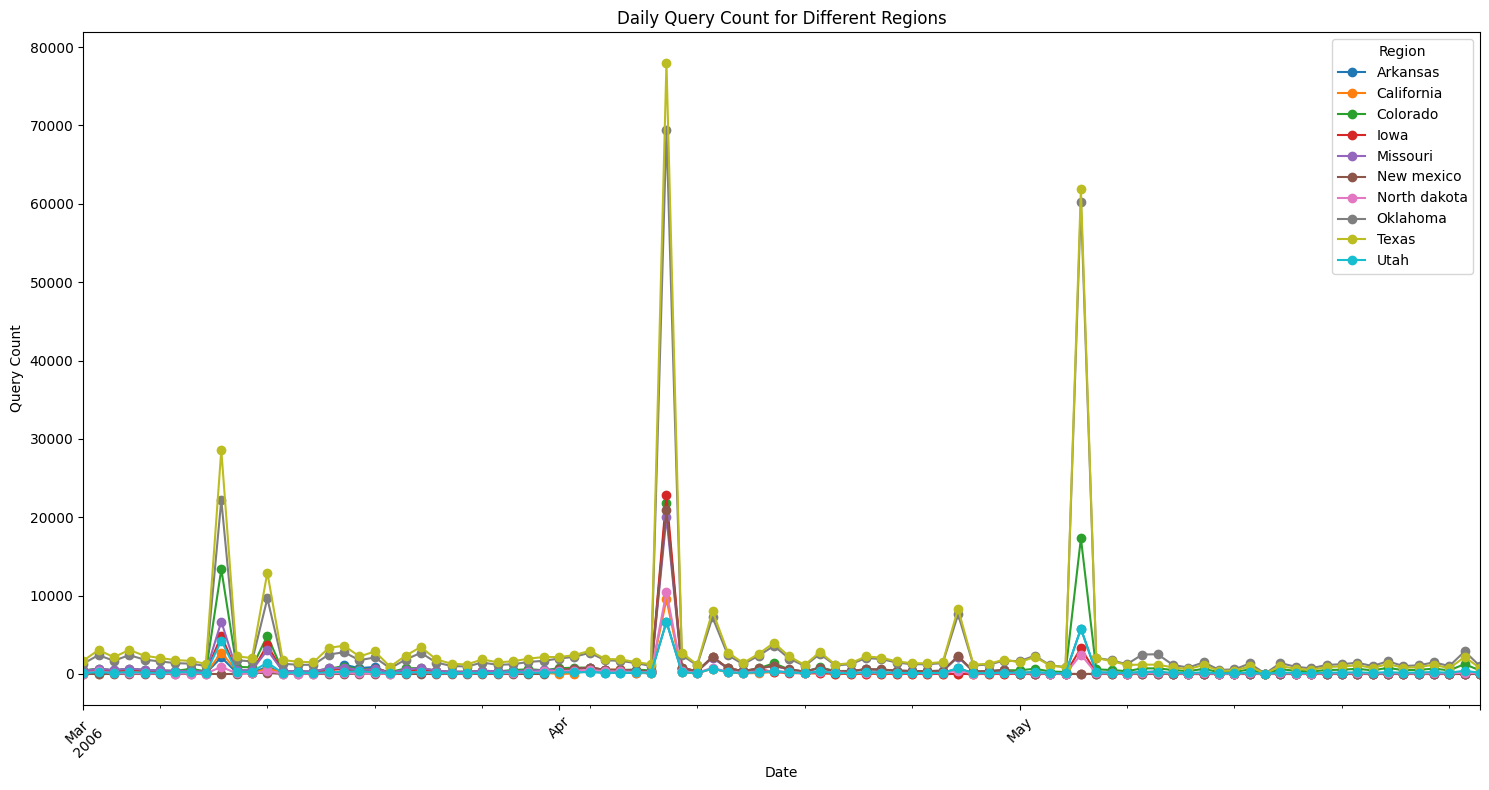

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weather_events3 has columns 'FORMATTED_DATE', 'REGION', 'QUERYCOUNT'
top_regions = (weather_events3.groupby('REGION')['QUERYCOUNT']
               .sum()
               .nlargest(10)
               .index)

# Step 2: Filter the DataFrame for only the top 10 regions
top_regions_df = weather_events3[weather_events3['REGION'].isin(top_regions)]

# Step 3: Pivot data to get regions as columns and formatted_date as rows
pivot_df = top_regions_df.pivot(index='FORMATTED_DATE', columns='REGION', values='QUERYCOUNT').fillna(0)

# Plot
plt.figure(figsize=(15, 8))
pivot_df.plot(kind='line', marker='o', figsize=(15, 8))

plt.title('Daily Query Count for Different Regions')
plt.xlabel('Date')
plt.ylabel('Query Count')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

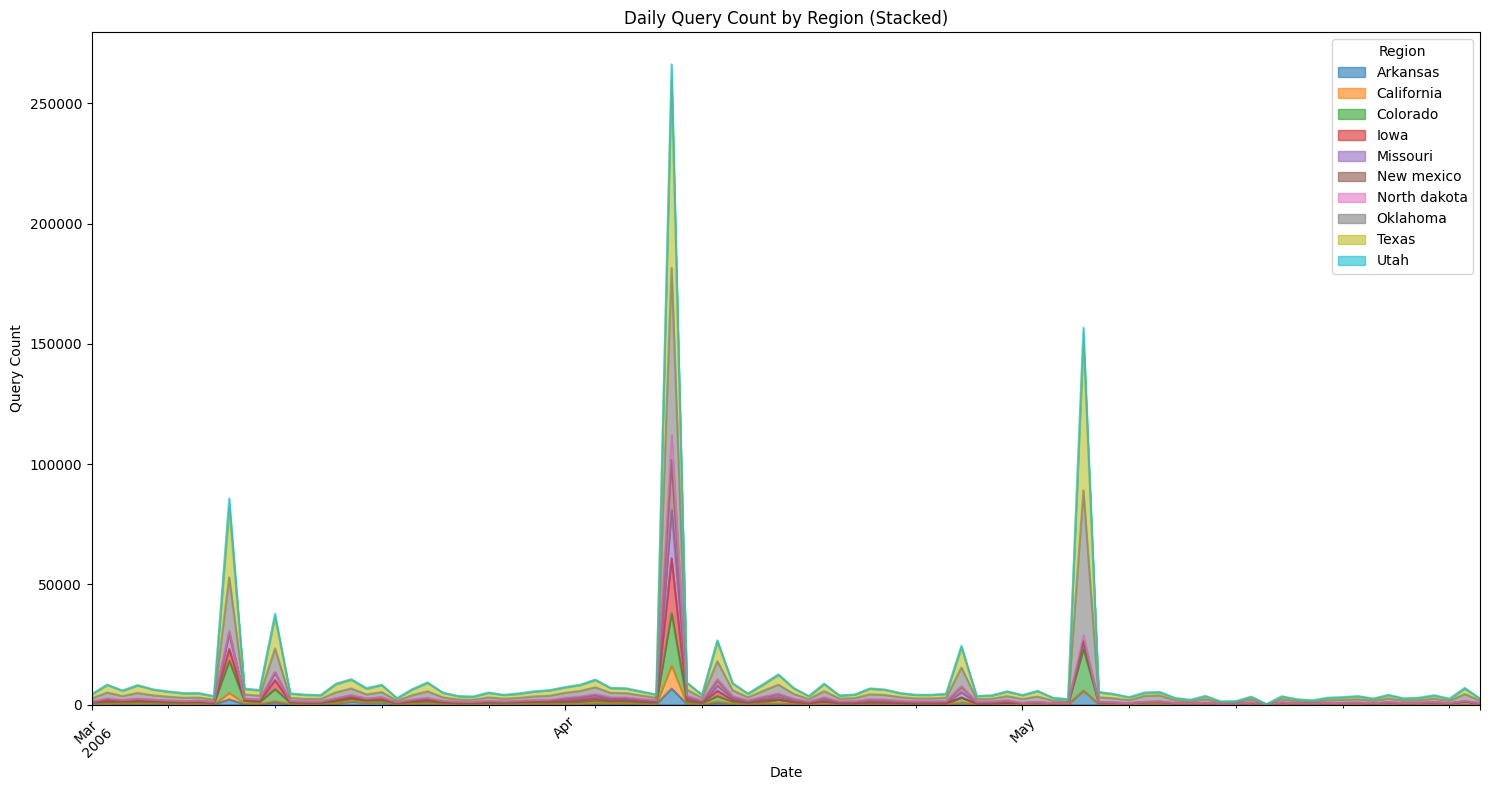

In [243]:
plt.figure(figsize=(15, 8))
pivot_df.plot(kind='area', stacked=True, figsize=(15, 8), alpha=0.6)

plt.title('Daily Query Count by Region (Stacked)')
plt.xlabel('Date')
plt.ylabel('Query Count')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


<Figure size 3000x2000 with 0 Axes>

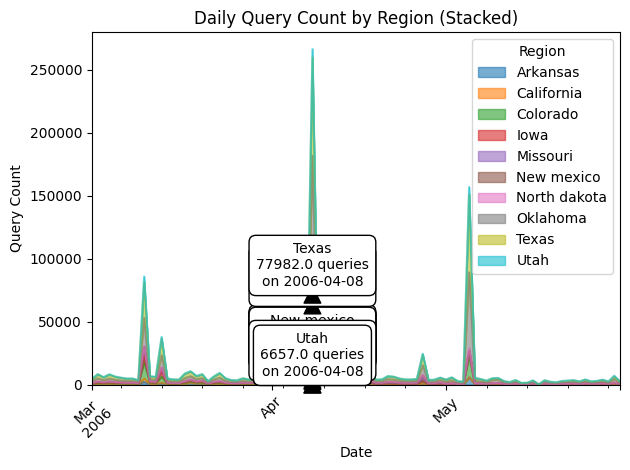

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pivot_df is your DataFrame with regions as columns and dates as index
# and the data has already been aggregated and formatted.

# Plot the stacked area chart
plt.figure(figsize=(30, 20))
pivot_df.plot(kind='area', stacked=True, alpha=0.6)

# Find the peak values for each region
for region in pivot_df.columns:
    # Find the row (date) with the maximum query count for the region
    peak_date = pivot_df[region].idxmax()  # Date with the peak query count
    peak_value = pivot_df[region].max()    # Peak query count

    # Annotate the peak with an arrow and text box
    plt.annotate(
        f'{region}\n{peak_value} queries\non {peak_date.strftime("%Y-%m-%d")}',
        xy=(peak_date, peak_value),  # Coordinates for the peak
        xytext=(peak_date, peak_value + 500),  # Offset the annotation vertically
        arrowprops=dict(facecolor='black', shrink=0.05),  # Arrow properties
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),  # Box properties
        horizontalalignment='center'
    )

# Customize the plot
plt.title('Daily Query Count by Region (Stacked)')
plt.xlabel('Date')
plt.ylabel('Query Count')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()
